## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9903259	total: 48.4ms	remaining: 48.3s
1:	learn: 0.9700838	total: 49.5ms	remaining: 24.7s
2:	learn: 0.9488079	total: 50.4ms	remaining: 16.8s
3:	learn: 0.9293710	total: 51.6ms	remaining: 12.8s
4:	learn: 0.9136152	total: 52.7ms	remaining: 10.5s
5:	learn: 0.8952516	total: 53.8ms	remaining: 8.91s
6:	learn: 0.8774957	total: 54.8ms	remaining: 7.78s
7:	learn: 0.8584811	total: 55.9ms	remaining: 6.93s
8:	learn: 0.8425147	total: 56.9ms	remaining: 6.27s
9:	learn: 0.8246825	total: 58ms	remaining: 5.74s
10:	learn: 0.8098762	total: 59ms	remaining: 5.3s
11:	learn: 0.7944858	total: 60ms	remaining: 4.94s
12:	learn: 0.7801829	total: 61ms	remaining: 4.63s
13:	learn: 0.7641472	total: 62.1ms	remaining: 4.37s
14:	learn: 0.7509162	total: 63.2ms	remaining: 4.15s
15:	learn: 0.7361537	total: 64.2ms	remaining: 3.94s
16:	learn: 0.7233746	total: 65.2ms	remaining: 3.77s
17:	learn: 0.7104606	total: 66.2ms	remaining: 3.61s
18:	learn: 0.6970540	total: 67.2ms	remaining: 3.47s
19

91:	learn: 0.3111547	total: 144ms	remaining: 1.42s
92:	learn: 0.3097868	total: 145ms	remaining: 1.41s
93:	learn: 0.3081463	total: 146ms	remaining: 1.41s
94:	learn: 0.3057540	total: 147ms	remaining: 1.4s
95:	learn: 0.3037822	total: 148ms	remaining: 1.4s
96:	learn: 0.3025032	total: 149ms	remaining: 1.39s
97:	learn: 0.3005014	total: 150ms	remaining: 1.38s
98:	learn: 0.2989057	total: 151ms	remaining: 1.38s
99:	learn: 0.2968705	total: 152ms	remaining: 1.37s
100:	learn: 0.2948236	total: 153ms	remaining: 1.36s
101:	learn: 0.2932025	total: 154ms	remaining: 1.36s
102:	learn: 0.2920301	total: 155ms	remaining: 1.35s
103:	learn: 0.2908594	total: 156ms	remaining: 1.35s
104:	learn: 0.2892794	total: 157ms	remaining: 1.34s
105:	learn: 0.2879880	total: 158ms	remaining: 1.33s
106:	learn: 0.2861532	total: 159ms	remaining: 1.33s
107:	learn: 0.2841665	total: 160ms	remaining: 1.32s
108:	learn: 0.2825576	total: 161ms	remaining: 1.32s
109:	learn: 0.2814497	total: 162ms	remaining: 1.31s
110:	learn: 0.2800042	t

223:	learn: 0.1935146	total: 280ms	remaining: 970ms
224:	learn: 0.1931948	total: 281ms	remaining: 969ms
225:	learn: 0.1928622	total: 282ms	remaining: 967ms
226:	learn: 0.1924420	total: 284ms	remaining: 966ms
227:	learn: 0.1919404	total: 285ms	remaining: 964ms
228:	learn: 0.1915329	total: 286ms	remaining: 962ms
229:	learn: 0.1909940	total: 287ms	remaining: 961ms
230:	learn: 0.1903314	total: 288ms	remaining: 960ms
231:	learn: 0.1895275	total: 289ms	remaining: 958ms
232:	learn: 0.1891872	total: 291ms	remaining: 956ms
233:	learn: 0.1888354	total: 292ms	remaining: 954ms
234:	learn: 0.1885165	total: 293ms	remaining: 953ms
235:	learn: 0.1881034	total: 294ms	remaining: 951ms
236:	learn: 0.1878655	total: 295ms	remaining: 949ms
237:	learn: 0.1876251	total: 296ms	remaining: 946ms
238:	learn: 0.1873099	total: 297ms	remaining: 945ms
239:	learn: 0.1867914	total: 298ms	remaining: 943ms
240:	learn: 0.1862215	total: 299ms	remaining: 941ms
241:	learn: 0.1856092	total: 300ms	remaining: 940ms
242:	learn: 

351:	learn: 0.1436460	total: 414ms	remaining: 762ms
352:	learn: 0.1431952	total: 417ms	remaining: 764ms
353:	learn: 0.1428347	total: 418ms	remaining: 762ms
354:	learn: 0.1424566	total: 419ms	remaining: 761ms
355:	learn: 0.1420784	total: 420ms	remaining: 759ms
356:	learn: 0.1418627	total: 421ms	remaining: 758ms
357:	learn: 0.1414678	total: 422ms	remaining: 756ms
358:	learn: 0.1413505	total: 423ms	remaining: 755ms
359:	learn: 0.1410096	total: 424ms	remaining: 753ms
360:	learn: 0.1407164	total: 425ms	remaining: 752ms
361:	learn: 0.1403453	total: 426ms	remaining: 750ms
362:	learn: 0.1402267	total: 427ms	remaining: 749ms
363:	learn: 0.1400421	total: 428ms	remaining: 747ms
364:	learn: 0.1398631	total: 429ms	remaining: 746ms
365:	learn: 0.1397260	total: 430ms	remaining: 744ms
366:	learn: 0.1393216	total: 431ms	remaining: 743ms
367:	learn: 0.1389523	total: 432ms	remaining: 741ms
368:	learn: 0.1385396	total: 433ms	remaining: 740ms
369:	learn: 0.1382342	total: 434ms	remaining: 738ms
370:	learn: 

482:	learn: 0.1104771	total: 549ms	remaining: 588ms
483:	learn: 0.1102047	total: 551ms	remaining: 588ms
484:	learn: 0.1100291	total: 553ms	remaining: 587ms
485:	learn: 0.1099920	total: 554ms	remaining: 586ms
486:	learn: 0.1099139	total: 555ms	remaining: 585ms
487:	learn: 0.1095676	total: 558ms	remaining: 585ms
488:	learn: 0.1093859	total: 559ms	remaining: 584ms
489:	learn: 0.1091234	total: 560ms	remaining: 583ms
490:	learn: 0.1088517	total: 561ms	remaining: 581ms
491:	learn: 0.1087120	total: 562ms	remaining: 580ms
492:	learn: 0.1084797	total: 563ms	remaining: 579ms
493:	learn: 0.1082818	total: 564ms	remaining: 578ms
494:	learn: 0.1081141	total: 565ms	remaining: 576ms
495:	learn: 0.1078207	total: 566ms	remaining: 575ms
496:	learn: 0.1076962	total: 567ms	remaining: 574ms
497:	learn: 0.1074309	total: 568ms	remaining: 572ms
498:	learn: 0.1073288	total: 569ms	remaining: 571ms
499:	learn: 0.1072243	total: 570ms	remaining: 570ms
500:	learn: 0.1070991	total: 571ms	remaining: 569ms
501:	learn: 

610:	learn: 0.0880742	total: 686ms	remaining: 437ms
611:	learn: 0.0879349	total: 687ms	remaining: 436ms
612:	learn: 0.0877946	total: 688ms	remaining: 435ms
613:	learn: 0.0875480	total: 689ms	remaining: 433ms
614:	learn: 0.0873272	total: 690ms	remaining: 432ms
615:	learn: 0.0871247	total: 692ms	remaining: 431ms
616:	learn: 0.0869275	total: 693ms	remaining: 430ms
617:	learn: 0.0867229	total: 694ms	remaining: 429ms
618:	learn: 0.0865321	total: 695ms	remaining: 428ms
619:	learn: 0.0864428	total: 696ms	remaining: 426ms
620:	learn: 0.0862944	total: 697ms	remaining: 425ms
621:	learn: 0.0860396	total: 698ms	remaining: 424ms
622:	learn: 0.0858654	total: 699ms	remaining: 423ms
623:	learn: 0.0857170	total: 700ms	remaining: 422ms
624:	learn: 0.0855619	total: 701ms	remaining: 421ms
625:	learn: 0.0855271	total: 702ms	remaining: 420ms
626:	learn: 0.0854634	total: 704ms	remaining: 419ms
627:	learn: 0.0853423	total: 705ms	remaining: 418ms
628:	learn: 0.0851374	total: 706ms	remaining: 416ms
629:	learn: 

738:	learn: 0.0702597	total: 822ms	remaining: 290ms
739:	learn: 0.0701697	total: 824ms	remaining: 290ms
740:	learn: 0.0699702	total: 825ms	remaining: 289ms
741:	learn: 0.0697966	total: 827ms	remaining: 287ms
742:	learn: 0.0697089	total: 828ms	remaining: 286ms
743:	learn: 0.0695663	total: 829ms	remaining: 285ms
744:	learn: 0.0695252	total: 830ms	remaining: 284ms
745:	learn: 0.0694959	total: 831ms	remaining: 283ms
746:	learn: 0.0694635	total: 832ms	remaining: 282ms
747:	learn: 0.0693262	total: 833ms	remaining: 281ms
748:	learn: 0.0691863	total: 834ms	remaining: 279ms
749:	learn: 0.0690215	total: 835ms	remaining: 278ms
750:	learn: 0.0689834	total: 836ms	remaining: 277ms
751:	learn: 0.0689140	total: 837ms	remaining: 276ms
752:	learn: 0.0688337	total: 838ms	remaining: 275ms
753:	learn: 0.0687149	total: 839ms	remaining: 274ms
754:	learn: 0.0686060	total: 840ms	remaining: 272ms
755:	learn: 0.0684418	total: 840ms	remaining: 271ms
756:	learn: 0.0683116	total: 841ms	remaining: 270ms
757:	learn: 

870:	learn: 0.0569517	total: 960ms	remaining: 142ms
871:	learn: 0.0568375	total: 961ms	remaining: 141ms
872:	learn: 0.0567290	total: 962ms	remaining: 140ms
873:	learn: 0.0566565	total: 963ms	remaining: 139ms
874:	learn: 0.0564592	total: 965ms	remaining: 138ms
875:	learn: 0.0563670	total: 965ms	remaining: 137ms
876:	learn: 0.0563077	total: 967ms	remaining: 136ms
877:	learn: 0.0561855	total: 968ms	remaining: 134ms
878:	learn: 0.0561215	total: 969ms	remaining: 133ms
879:	learn: 0.0560228	total: 970ms	remaining: 132ms
880:	learn: 0.0559933	total: 971ms	remaining: 131ms
881:	learn: 0.0559074	total: 972ms	remaining: 130ms
882:	learn: 0.0557769	total: 973ms	remaining: 129ms
883:	learn: 0.0556951	total: 974ms	remaining: 128ms
884:	learn: 0.0556245	total: 975ms	remaining: 127ms
885:	learn: 0.0555656	total: 976ms	remaining: 126ms
886:	learn: 0.0554698	total: 977ms	remaining: 124ms
887:	learn: 0.0553820	total: 978ms	remaining: 123ms
888:	learn: 0.0553179	total: 979ms	remaining: 122ms
889:	learn: 

994:	learn: 0.0469973	total: 1.09s	remaining: 5.49ms
995:	learn: 0.0469020	total: 1.09s	remaining: 4.39ms
996:	learn: 0.0468628	total: 1.09s	remaining: 3.29ms
997:	learn: 0.0467631	total: 1.09s	remaining: 2.19ms
998:	learn: 0.0466574	total: 1.1s	remaining: 1.1ms
999:	learn: 0.0465515	total: 1.1s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

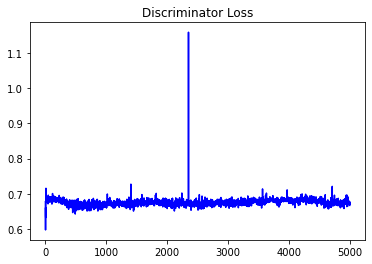

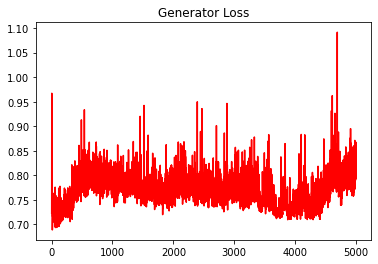

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

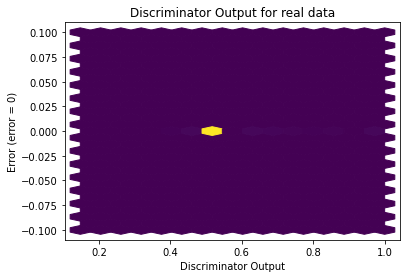

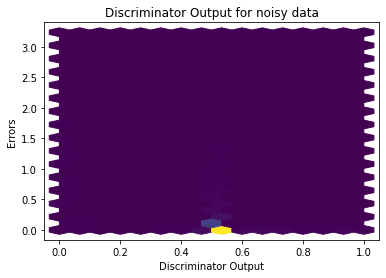

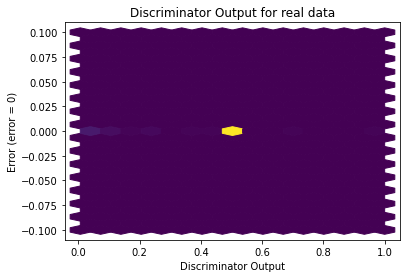

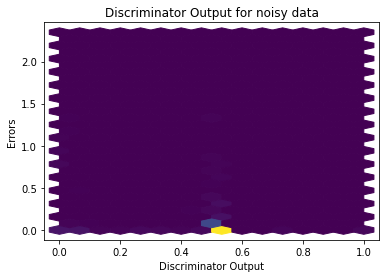

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


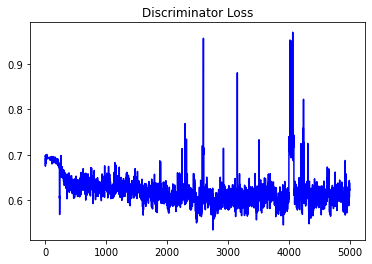

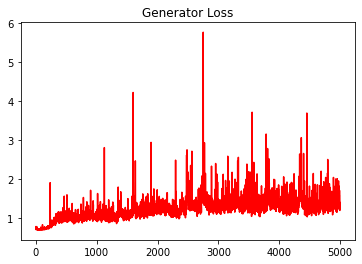

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

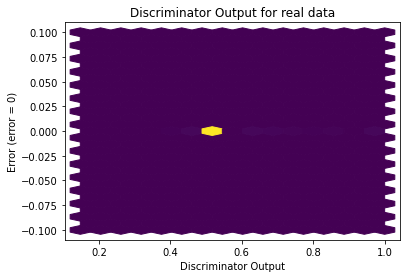

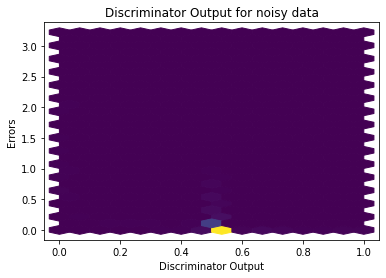

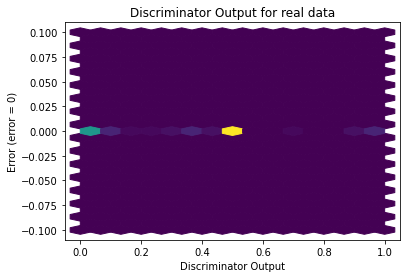

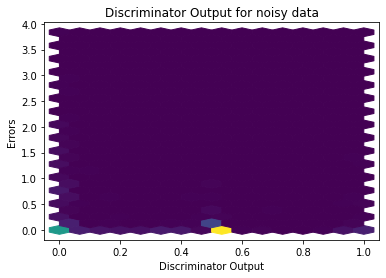

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9915]], device='cuda:0', requires_grad=True)
